In [1]:
import openmeteo_requests
import matplotlib.pyplot as plt
import requests_cache
import pandas as pd
import numpy as np
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from retry_requests import retry


In [2]:
def call_open_meteo_max(selected_station, start, end):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)

    # Initialize an empty list to store daily data
    daily_data = []

    # Define the start and end dates for the loop
    start_date = pd.Timestamp(start)
    end_date = pd.Timestamp(end)

    # Iterate through each day of December
    while start_date <= end_date:
        # Define the parameters for the API call
        params = {
            "latitude": selected_station["lat"],
            "longitude": selected_station["lon"],
            "start_date": start_date.strftime("%Y-%m-%d"),
            "end_date": start_date.strftime("%Y-%m-%d"),  # Use the same start and end date for daily data
            "daily": "wind_speed_10m_max",
            "timezone": "Europe/Berlin",
        }

        # Make the API call
        responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)

        for response in responses:
            # Process daily data. The order of variables needs to be the same as requested.
            daily = response.Daily()
            daily_wind_speed_10m_max = daily.Variables(0).ValuesAsNumpy()

            # Calculate the average wind speed for the day
            max_wind_speed = daily_wind_speed_10m_max.max()

            # Append the average wind speed for the day to daily_data
            daily_data.append({
                "date": start_date.strftime('%m-%d'),  # Format date to include year, month, and day
                "wind_speed_10m_max": max_wind_speed,  # Use the average wind speed
            })

        # Move to the next day
        start_date += pd.Timedelta(days=1)

    # Create a DataFrame from daily data
    daily_dataframe = pd.DataFrame(daily_data)
    
    # Calculate daily averages
    daily_max = daily_dataframe.groupby('date').max()
    return daily_max

In [3]:
def call_open_meteo_temp(selected_station, start, end):
    # Setup the Open-Meteo API client with cache and retry on error
    cache_session = requests_cache.CachedSession(".cache", expire_after=-1)
    retry_strategy = Retry(total=5, backoff_factor=0.2)
    adapter = HTTPAdapter(max_retries=retry_strategy)
    cache_session.mount('http://', adapter)
    cache_session.mount('https://', adapter)
    openmeteo = openmeteo_requests.Client(session=cache_session)

    # Initialize an empty list to store daily data
    daily_data = []

    # Define the start and end dates for the loop
    start_date = pd.Timestamp(start)
    end_date = pd.Timestamp(end)

    # Iterate through each day of December
    while start_date <= end_date:
        # Define the parameters for the API call
        params = {
            "latitude": selected_station["lat"],
            "longitude": selected_station["lon"],
            "start_date": start_date.strftime("%Y-%m-%d"),
            "end_date": start_date.strftime("%Y-%m-%d"),  # Use the same start and end date for daily data
            "daily": "temperature_2m_mean",
            "timezone": "Europe/Berlin",
        }

        # Make the API call
        responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)

        for response in responses:
            # Process daily data. The order of variables needs to be the same as requested.
            daily = response.Daily()
            daily_temp_mean = daily.Variables(0).ValuesAsNumpy()

            # Calculate the average wind speed for the day
            avg_wind_speed = daily_temp_mean.mean()

            # Append the average wind speed for the day to daily_data
            daily_data.append({
                "date": start_date.strftime('%m-%d'),  # Format date to include year, month, and day
                "temperature_2m_mean": avg_wind_speed,  # Use the average wind speed
            })

        # Move to the next day
        start_date += pd.Timedelta(days=1)

    # Create a DataFrame from daily data
    daily_dataframe = pd.DataFrame(daily_data)
    
    # Calculate daily averages
    daily_avg = daily_dataframe.groupby('date').mean()
    return daily_avg

In [4]:
def plot_Lothar(Wind_lothar, Ortschaft):
    data = pd.concat([Wind_lothar], axis=1)
    data.columns = ['Orkan Lothar']
    # Plot
    ax = data.plot(kind='line', figsize=(30, 6), linewidth=5, color='red')
    # Beschriftungen und Anpassungen
    plt.xlabel('Tag')
    plt.ylabel('Windgeschwindigkeit in m/s')
    plt.title(f'Lothars Windgeschwindigkeit in {Ortschaft}', fontsize=14, fontweight='bold')
    plt.grid(False)
    plt.legend([])
    # Plot-Begrenzungen oben und rechts entfernen
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

In [5]:
start = "1999-12-20"
end = "1999-12-31"

In [31]:
#Deutschland
Berlin={'lat': 52.5200, 'lon': 13.4050}
Berlin_wind_Lothar = call_open_meteo_max(Berlin,  start, end)
Berlin_temp = call_open_meteo_temp(Berlin,  start, end)
Frankfurt = {'lat': 50.110924, 'lon': 8.682127}
Frankfurt_wind_Lothar = call_open_meteo_max(Frankfurt,  start, end)
Frankfurt_Temp = call_open_meteo_temp(Frankfurt,  start, end)

In [ ]:
plot_Lothar(Frankfurt_wind_Lothar, "Frankfurt")
plot_Lothar(Berlin_wind_Lothar, "Berlin")

In [39]:
#Frankreich
Caen = {'lat': 49.1829, 'lon': -0.3707}
Caen_wind_Lothar = call_open_meteo_max(Caen,  start, end)
Caen_Temp = call_open_meteo_temp(Caen,  start, end)
Rouen = {'lat': 49.4431, 'lon': 1.0993}
Rouen_wind_Lothar = call_open_meteo_max(Rouen, start, end)
Rouen_Temp = call_open_meteo_temp(Rouen, start, end)
Le_Havre = {'lat': 49.4938, 'lon': 0.1077}
Le_Havre_wind_Lothar = call_open_meteo_max(Le_Havre, start, end)
Le_Havre_Temp = call_open_meteo_temp(Le_Havre, start, end)
Paris = {'lat': 48.8566, 'lon': 2.3522}
Paris_wind_Lothar = call_open_meteo_max(Paris, start, end)
Paris_Temp = call_open_meteo_temp(Paris, start, end)
Le_Mans = {'lat': 48.0061, 'lon': 0.1996}
Le_Mans_Lothar = call_open_meteo_max(Le_Mans, start, end)
Le_Mans_Temp = call_open_meteo_temp(Le_Mans, start, end)
Nantes = {'lat': 47.2184, 'lon': -1.5536}
Nantes_wind_Lothar = call_open_meteo_max(Nantes, start, end)
Nantes_Temp = call_open_meteo_temp(Nantes, start, end)
Montpellier = {'lat': 43.6109, 'lon': 3.8772}
Montpellier = call_open_meteo_max(Montpellier, start, end)
Montpellier = call_open_meteo_temp(Montpellier, start, end)
Nizza = {'lat': 43.7102, 'lon': 7.2620}
Nizza = call_open_meteo_max(Nizza, start, end)
Nizza = call_open_meteo_temp(Nizza, start, end)
Lyon = {'lat': 45.7578, 'lon': 4.8320}
Lyon_Lothar = call_open_meteo_max(Lyon, start, end)
Lyon_Temp = call_open_meteo_temp(Lyon, start, end)
Nancy = {'lat': 48.6921, 'lon': 6.1844}
Nancy_Lothar = call_open_meteo_max(Nancy, start, end)
Nancy_Temp = call_open_meteo_temp(Nancy, start, end)
Reims = {'lat': 49.2583, 'lon': 4.0317}
Reims_Lothar = call_open_meteo_max(Reims, start, end)
Lille = {'lat': 50.6292, 'lon': 3.0573}
Lille_Lothar = call_open_meteo_max(Lille, start, end)
Lille_Temp = call_open_meteo_temp(Lille, start, end)

KeyError: 'lat'

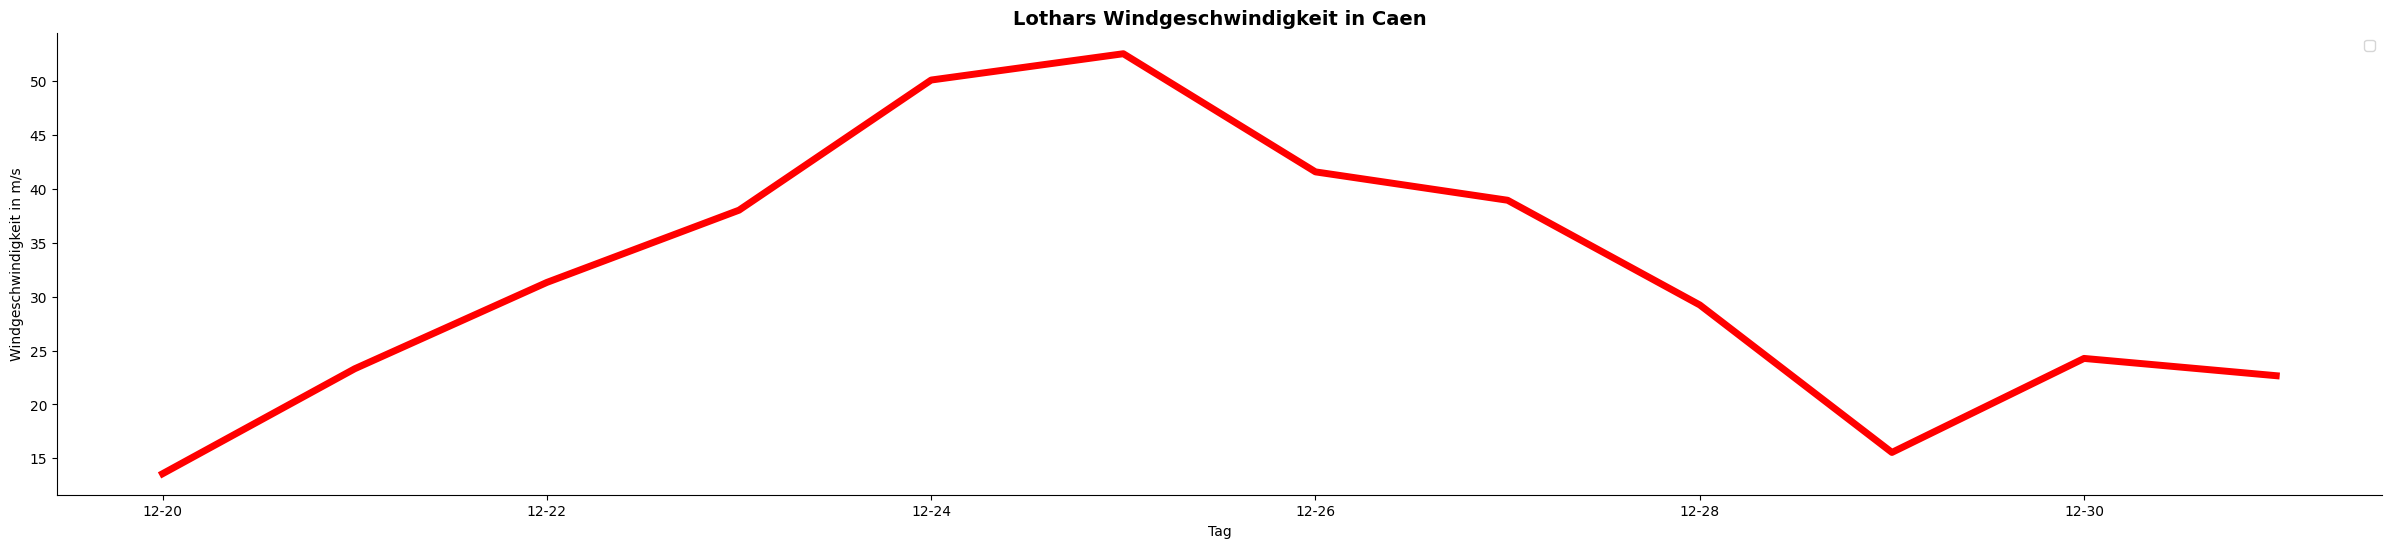

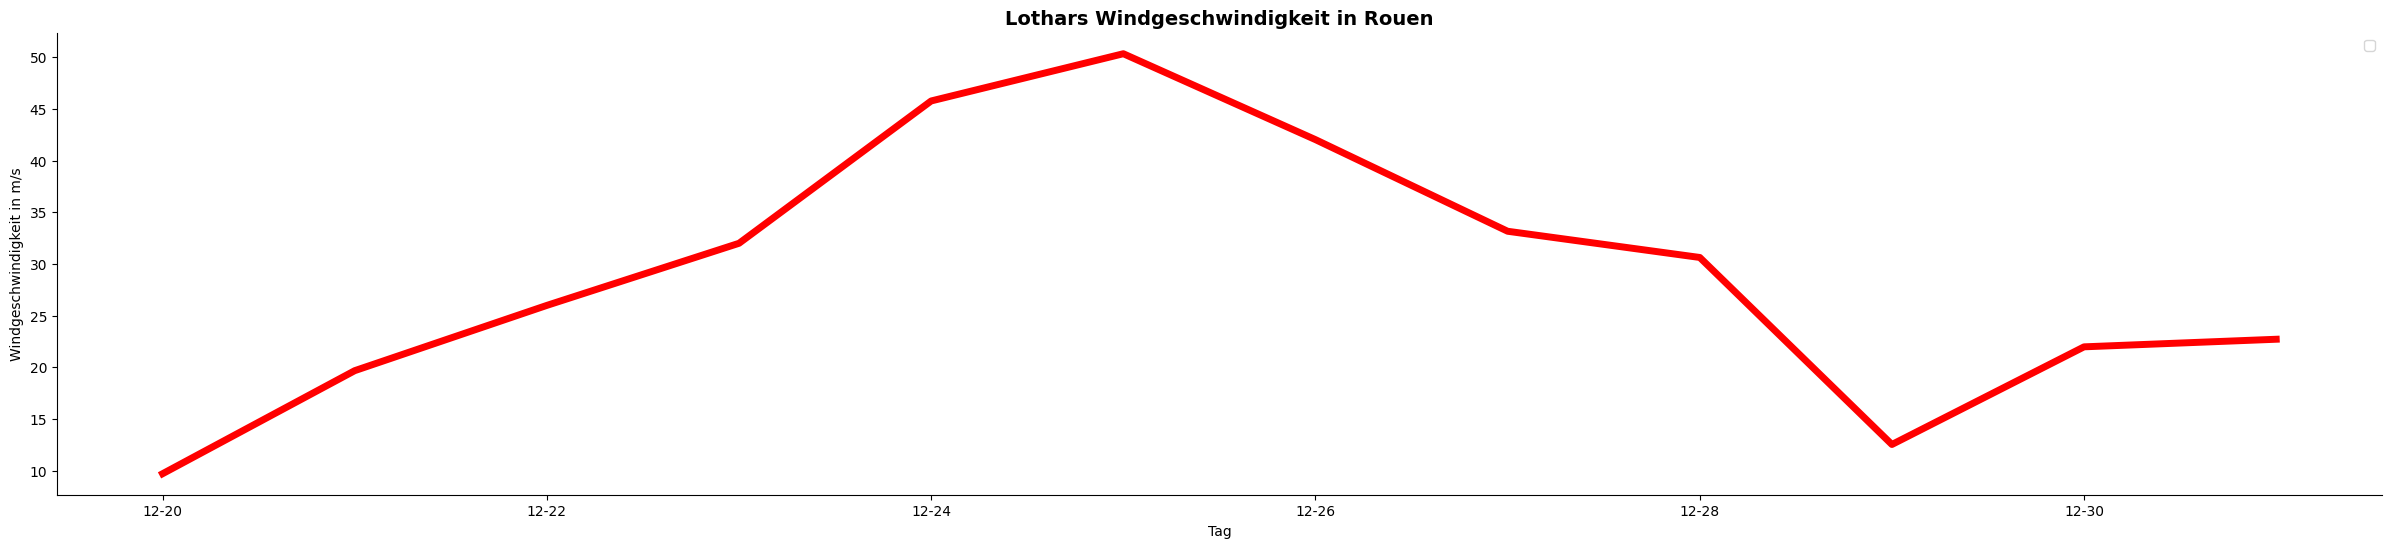

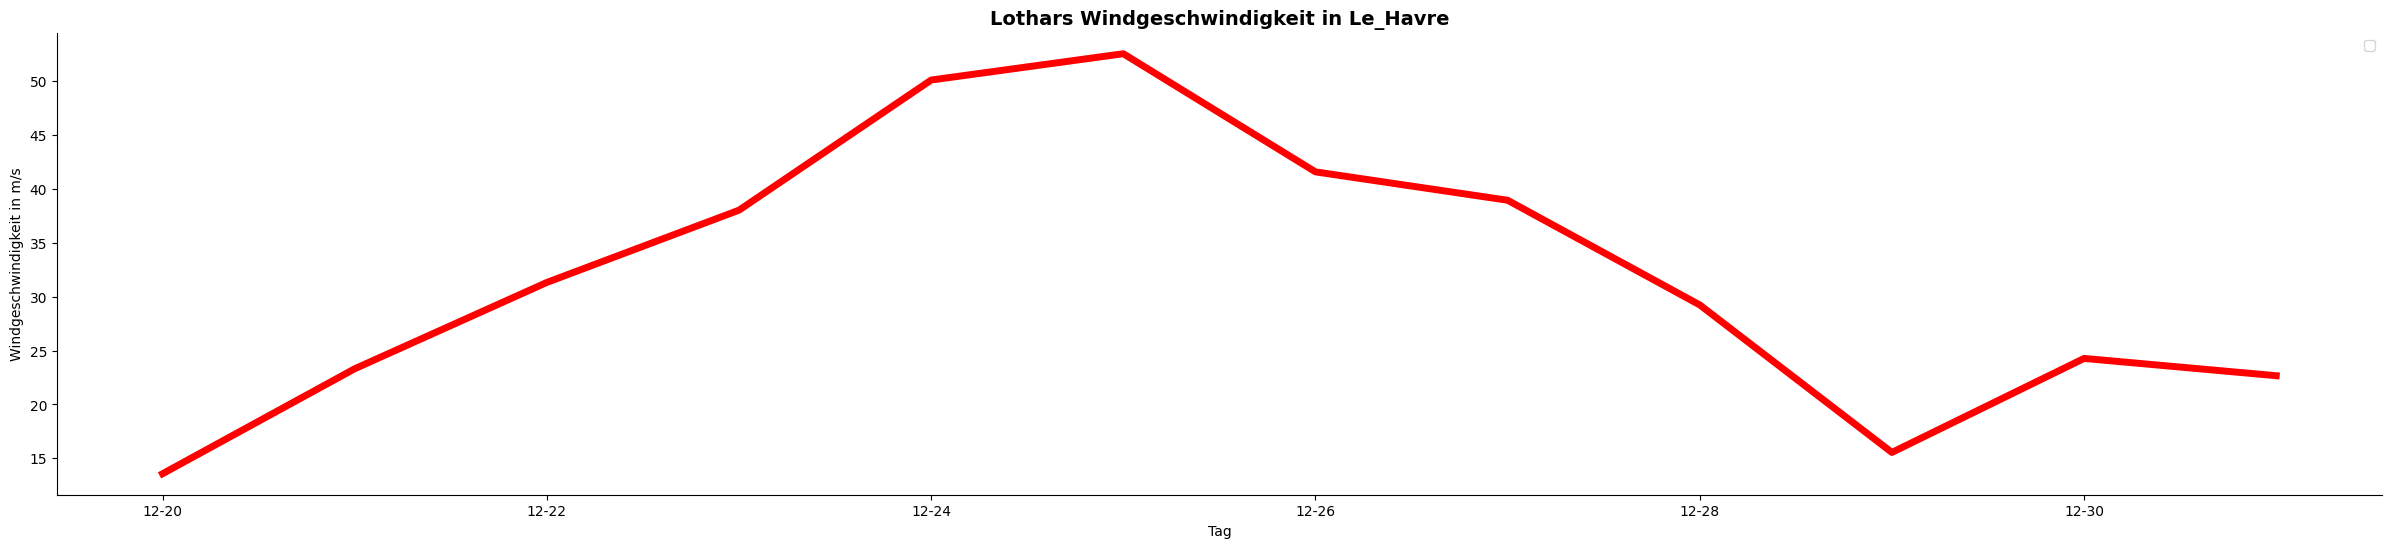

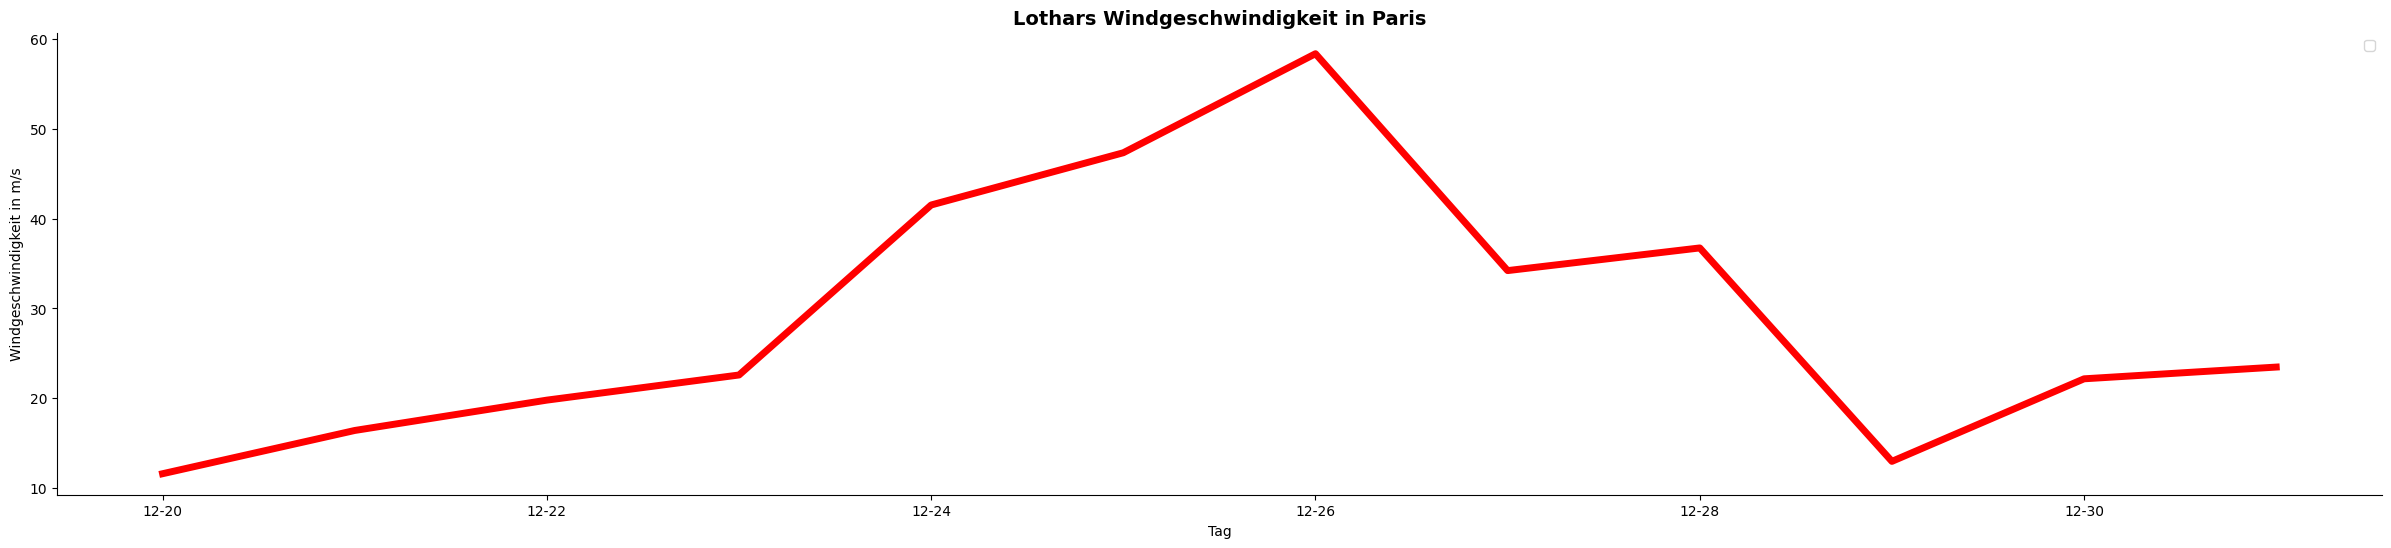

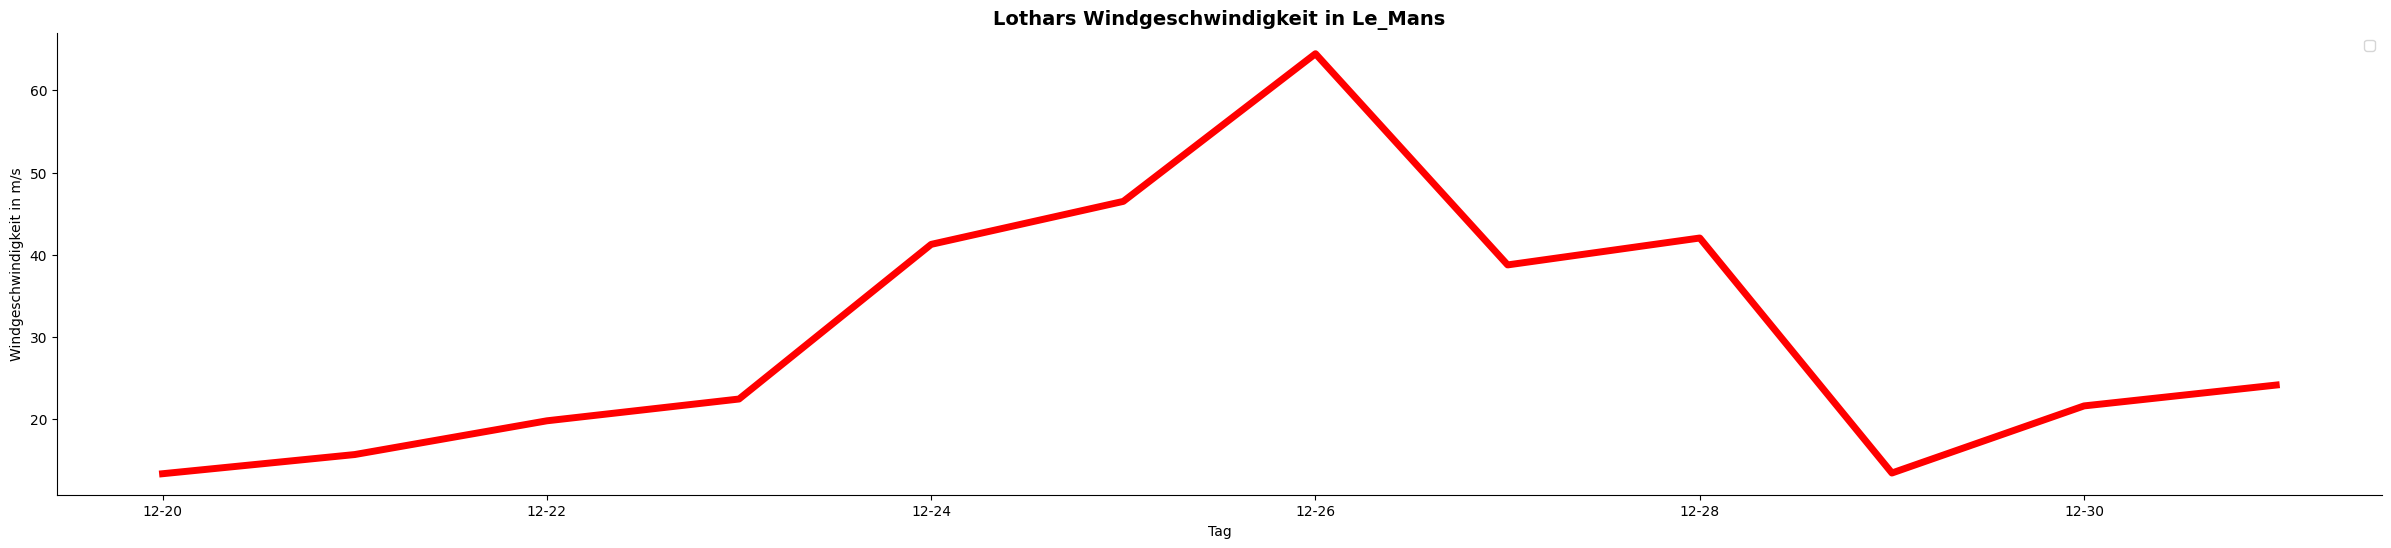

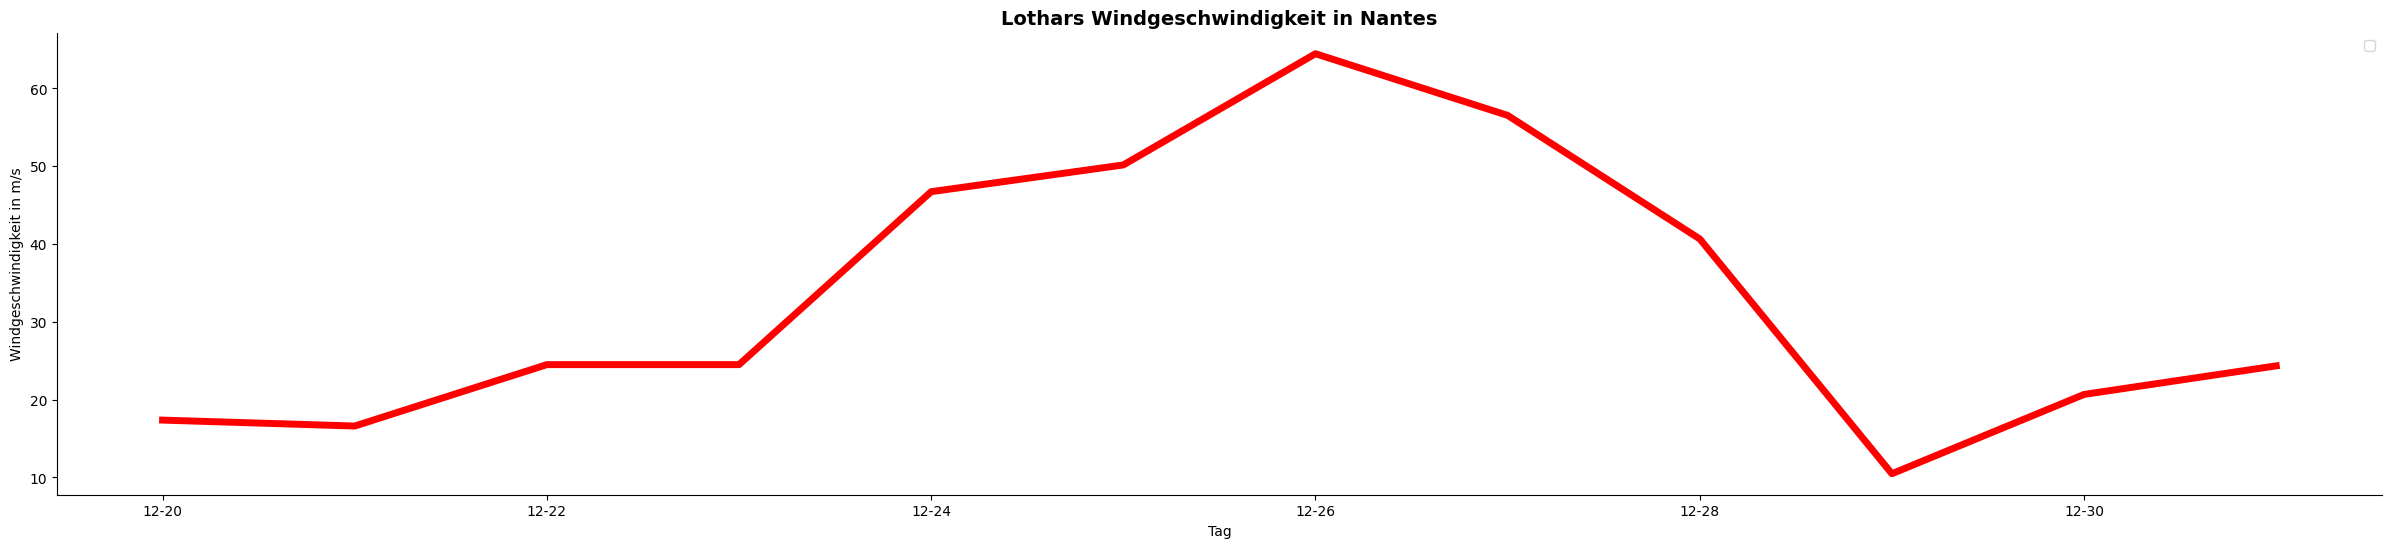

NameError: name 'Montpellier' is not defined

In [38]:
plot_Lothar(Caen_wind_Lothar, "Caen")
plot_Lothar(Rouen_wind_Lothar, "Rouen")
plot_Lothar(Le_Havre_wind_Lothar, "Le_Havre")
plot_Lothar(Paris_wind_Lothar, "Paris")
plot_Lothar(Le_Mans_Lothar, "Le_Mans")
plot_Lothar(Nantes_wind_Lothar, "Nantes")
plot_Lothar(Montpellier, "Montpellier")
plot_Lothar(Nizza, "Nizza")
plot_Lothar(Lyon_Lothar, "Lyon")
plot_Lothar(Nancy_Lothar, "Nancy")
plot_Lothar(Lille_Lothar, "Lille")

In [38]:
#Luxenbrug
Luxemburg = {'lat': 49.6116, 'lon': 6.1319}
Luxemburg_wind_Lothar = call_open_meteo_max(Luxemburg, start, end)
Luxemburg_Temp = call_open_meteo_temp(Luxemburg, start, end)

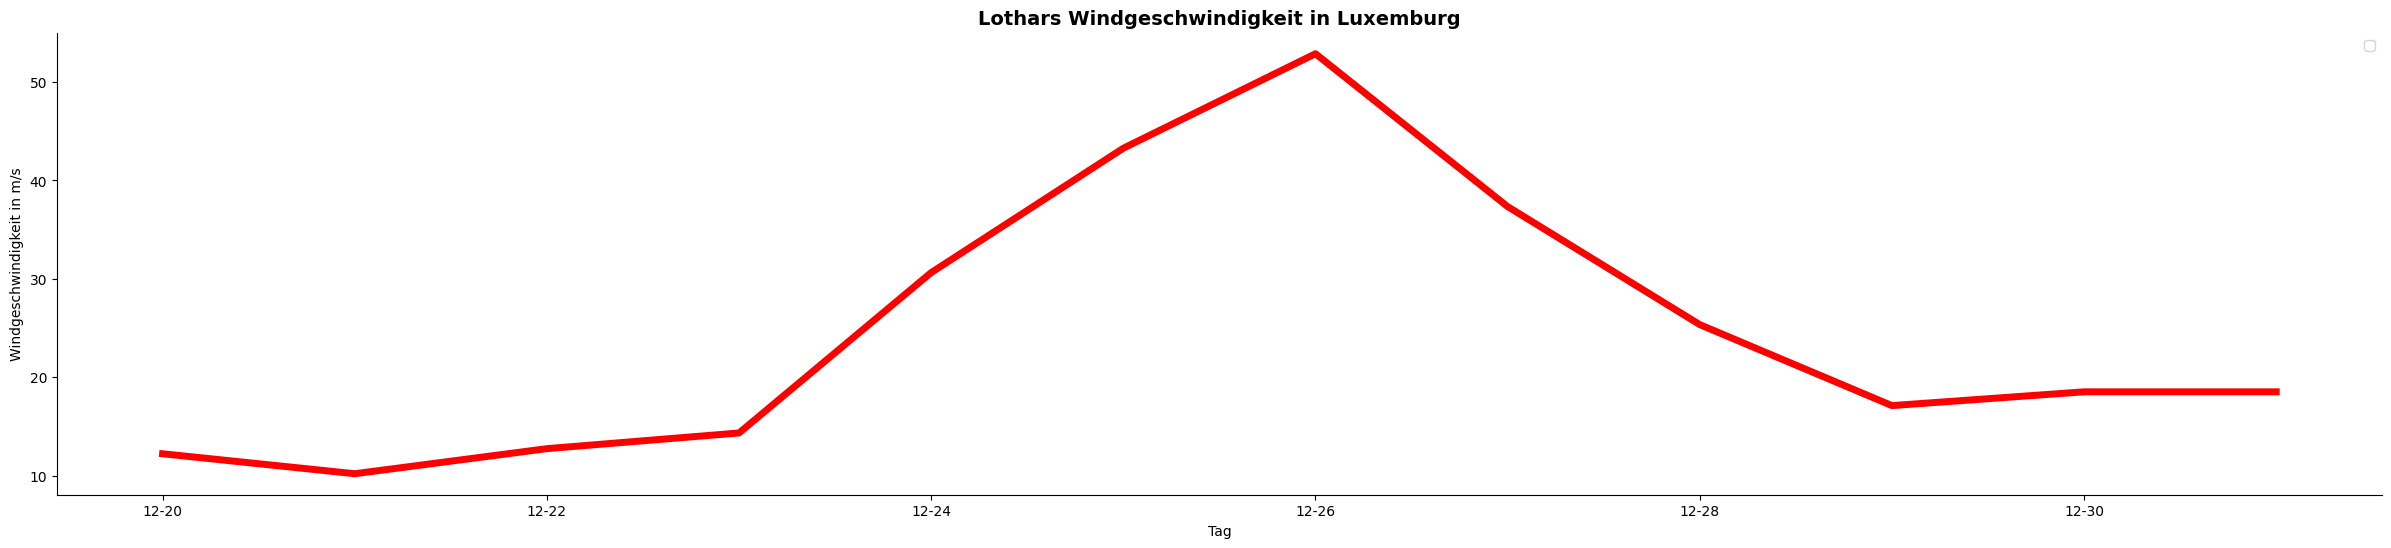

In [39]:
plot_Lothar(Luxemburg_wind_Lothar, "Luxemburg")

In [34]:
#Schweiz
Genf = {'lat': 46.2044, 'lon': 6.1432}
Genf_wind_Lothar = call_open_meteo_max(Genf, start, end)
Genf_Temp = call_open_meteo_temp(Genf, start, end)
Bern = {'lat': 46.9480, 'lon': 7.4474}
Bern_wind_Lothar = call_open_meteo_max(Bern, start, end)
Bern_Temp = call_open_meteo_temp(Bern, start, end)
Basel = {'lat': 47.5596, 'lon': 7.5886}
Basel_wind_Lothar = call_open_meteo_max(Basel, start, end)
Basel_Temp = call_open_meteo_temp(Basel, start, end)
Zürich = {'lat': 47.3769, 'lon': 8.5417}
Zürich_wind_Lothar = call_open_meteo_max(Zürich, start, end)
Zürich_Temp = call_open_meteo_temp(Zürich, start, end)
Chur = {'lat': 46.8500, 'lon': 9.5333}
Chur_wind_Lothar = call_open_meteo_max(Chur, start, end)
Chur_Temp = call_open_meteo_temp(Chur, start, end)

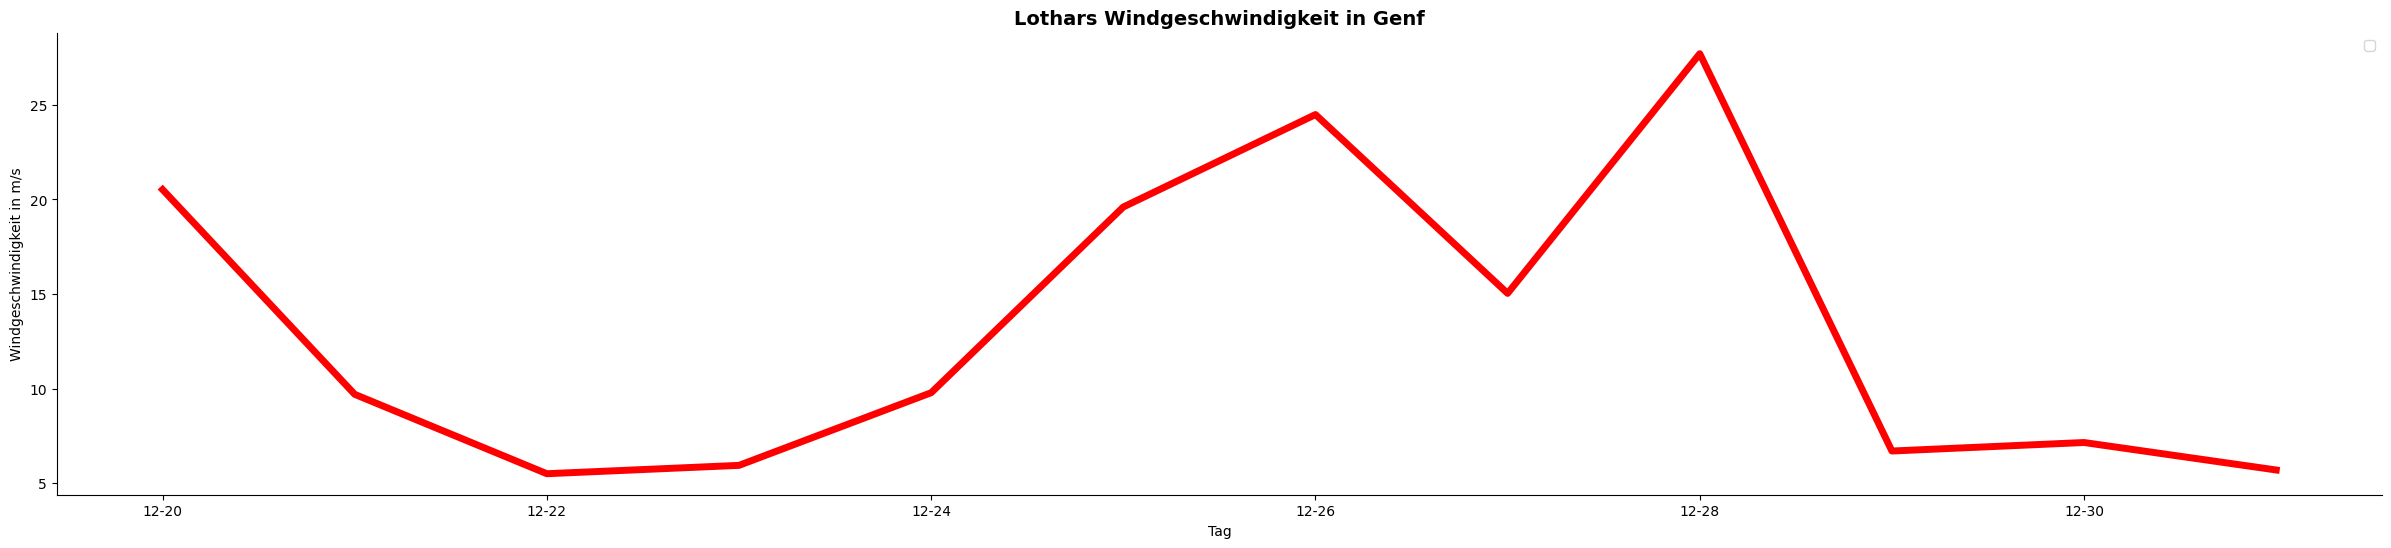

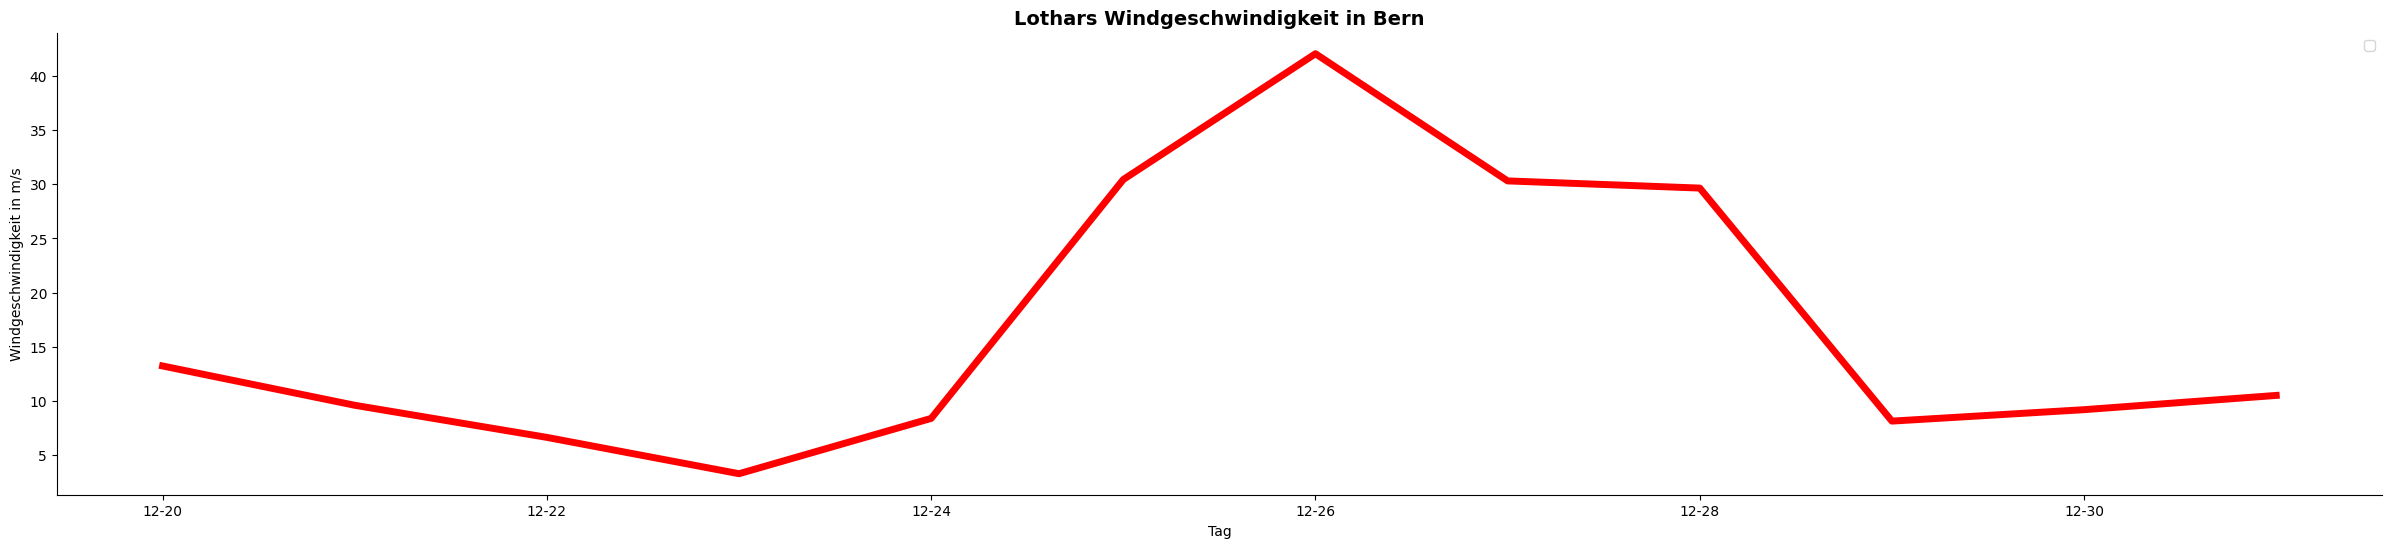

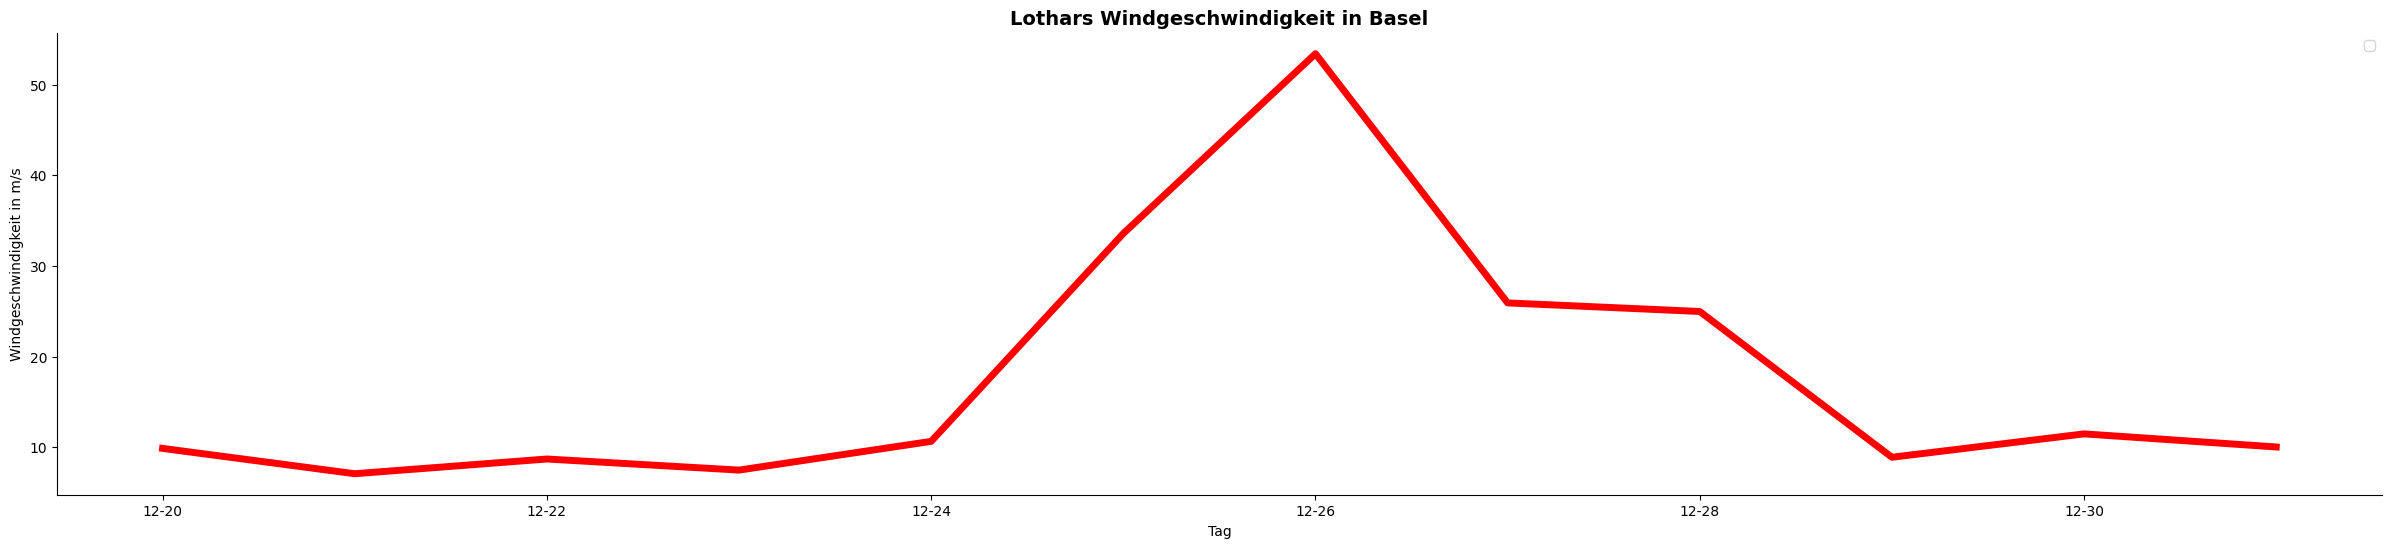

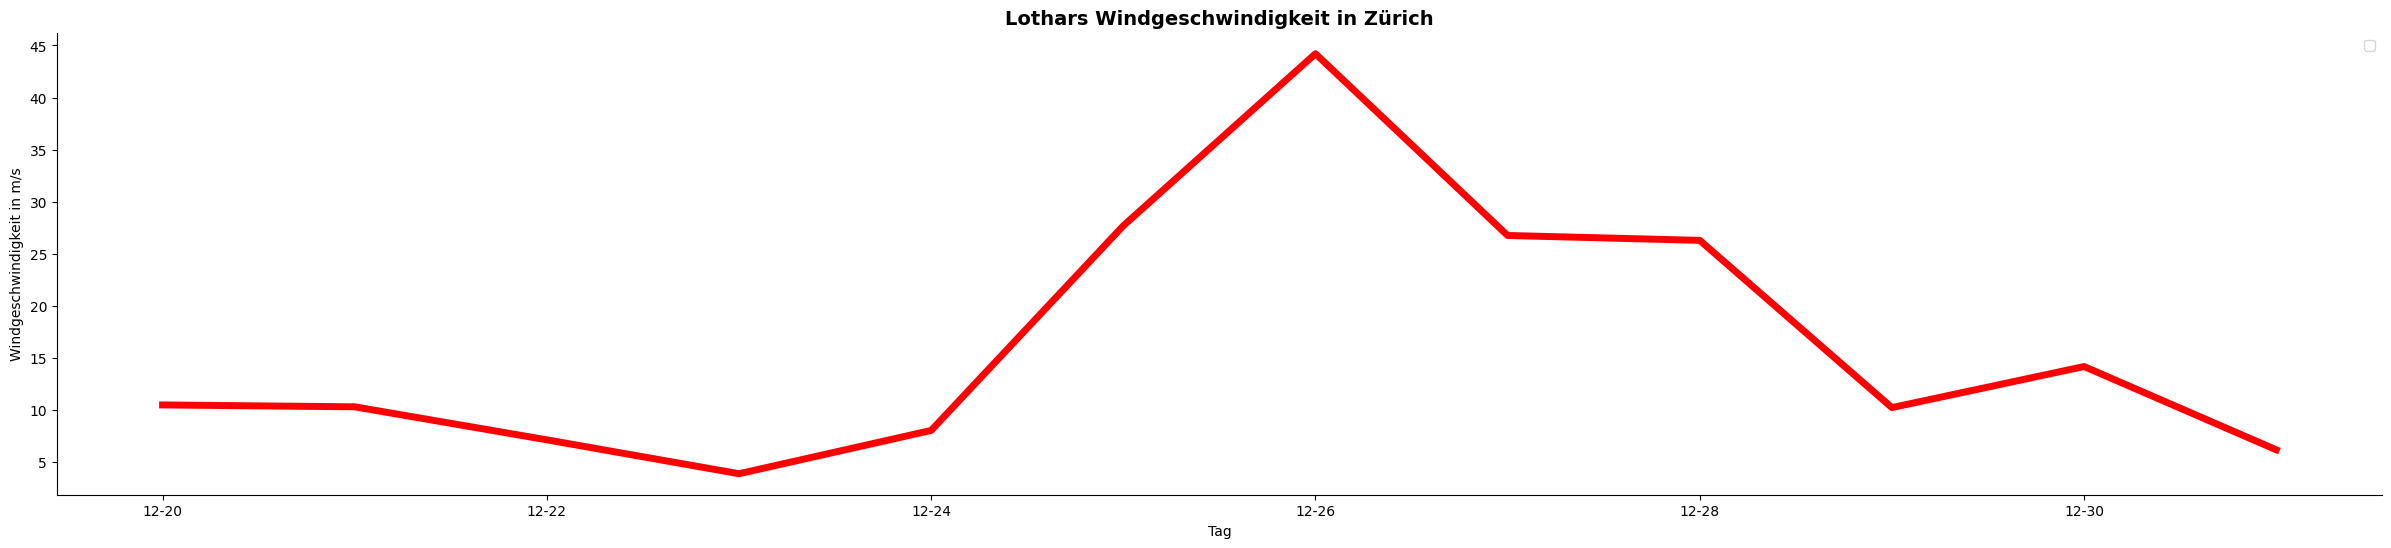

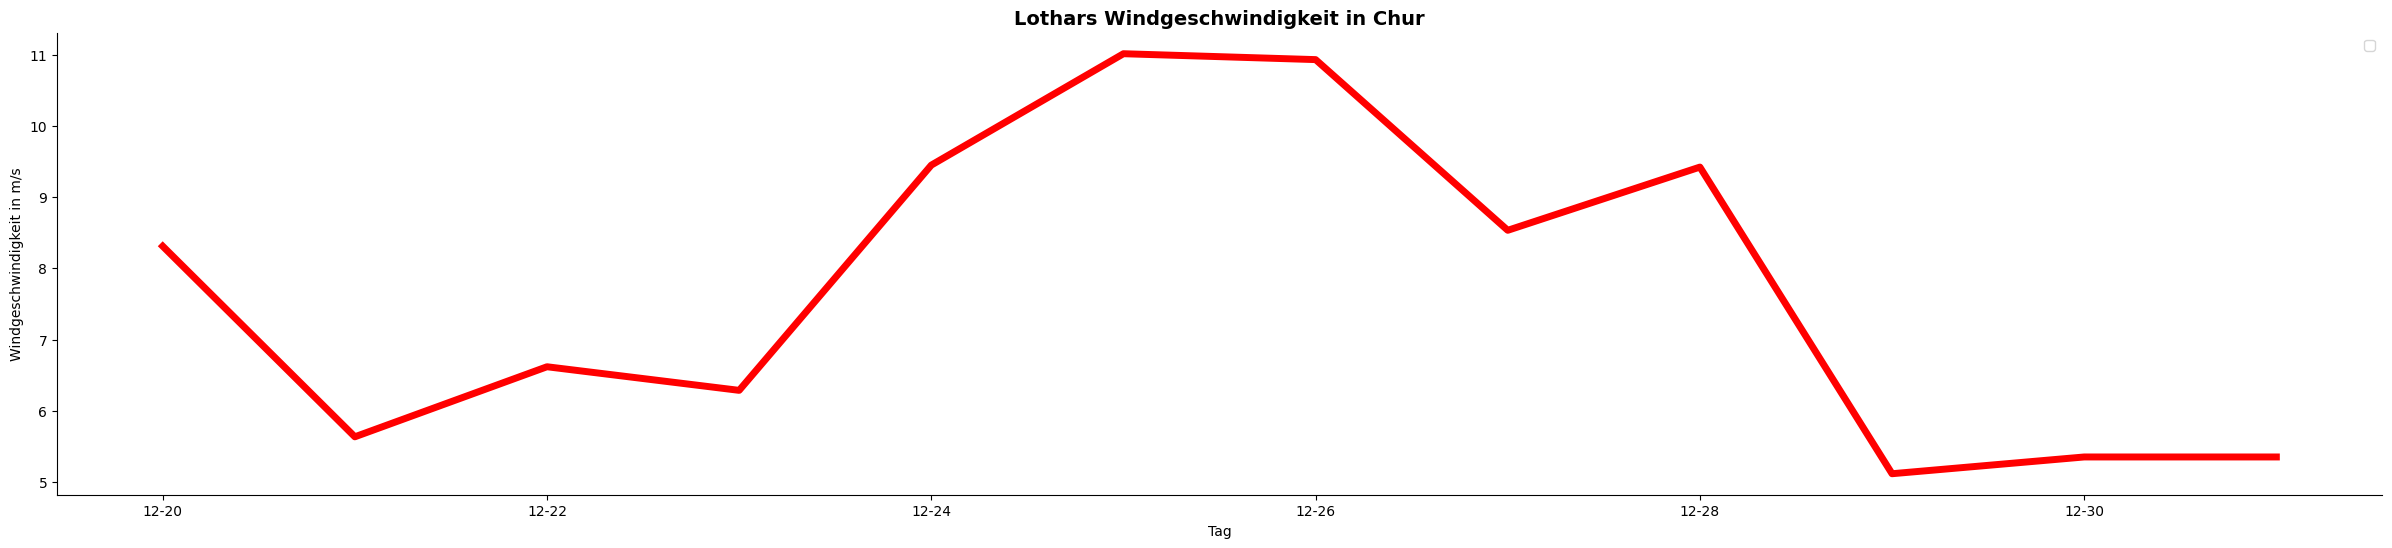

In [35]:
plot_Lothar(Genf_wind_Lothar, "Genf")
plot_Lothar(Bern_wind_Lothar, "Bern")
plot_Lothar(Basel_wind_Lothar, "Basel")
plot_Lothar(Zürich_wind_Lothar, "Zürich")
plot_Lothar(Chur_wind_Lothar, "Chur")